In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()

In [3]:
data=wine.data
label=wine.target
columns=wine.feature_names

In [6]:
data=pd.DataFrame(data,columns=columns)

In [7]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
# PCA (차원의 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [11]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
cluster=kmeans.predict(data)

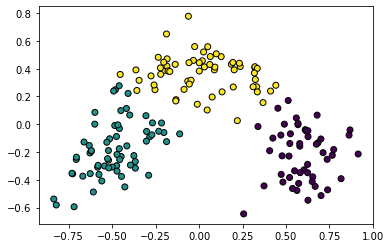

In [14]:
plt.scatter(data[:,0],data[:,1],c=cluster,edgecolors='black')

In [25]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3,linkage='single')
complete_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
average_clustering = AgglomerativeClustering(n_clusters=3,linkage='average')

In [26]:
single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [28]:
single_cluster=single_clustering.labels_
complete_cluster=complete_clustering.labels_
average_cluster=average_clustering.labels_

In [29]:
print(single_cluster)
print(complete_cluster)
print(average_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 

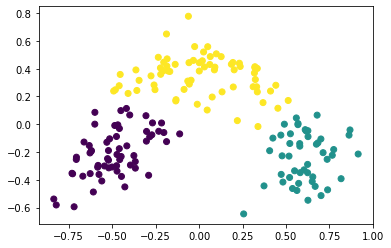

In [23]:
plt.scatter(data[:,0],data[:,1],c=average_cluster)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [32.5, 32.5, 55.0, 55.0],
  [43.75, 43.75, 65.0, 65.0],
  [10.0, 10.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [92.5, 92.5, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [132.5, 132.5, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [143.75, 143.75, 170.0, 170.0],
  [156.875, 156.875, 185.0, 185.0],
  [170.9375, 170.9375, 195.0, 195.0],
  [103.75, 103.75, 182.96875, 182.96875],
  [205.0, 205.0, 215.0, 215.0],
  [143.359375, 143.359375, 210.0, 210.0],
  [176.6796875, 176.6796875, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [200.83984375, 200.83984375, 250.0, 250.0],
  [75.0, 75.0, 225.419921875, 225.419921875],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [287.5, 287.5,

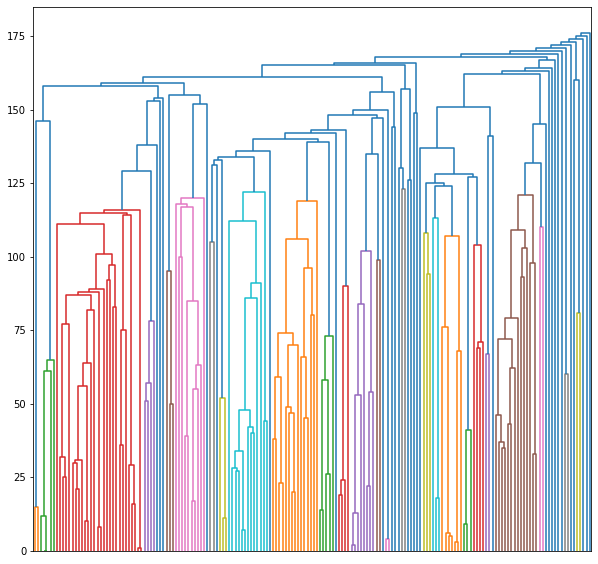

In [32]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))
chidren=single_clustering.children_
distance=np.arange(chidren.shape[0])
no_of_observations=np.arange(2,chidren.shape[0]+2)
linkage_matrix=np.column_stack([chidren,distance,no_of_observations]).astype(float)

dendrogram(linkage_matrix,p=len(data),labels=single_cluster,show_contracted=True,no_labels=True)

In [36]:
from sklearn.metrics import silhouette_score
best_n1=1
best_score=-1

for n_cluster in range(2,11):
    average_clustering=KMeans(n_clusters=n_cluster)
    average_clustering.fit(data)
    cluster=average_clustering.labels_
    score=silhouette_score(data,cluster)
    
    print('클러스터 수: {} 실루엣 점수:{:.2f}'.format(n_cluster,score))
    
    if score> best_score:
        best_n=n_cluster
        best_score=score
print('best 실루엣 점수를 가진 클러스터수 :{}, 실루엣점수{:.2f}'.format(best_n,best_score))

클러스터 수: 2 실루엣 점수:0.49
클러스터 수: 3 실루엣 점수:0.57
클러스터 수: 4 실루엣 점수:0.49
클러스터 수: 5 실루엣 점수:0.46
클러스터 수: 6 실루엣 점수:0.43
클러스터 수: 7 실루엣 점수:0.40
클러스터 수: 8 실루엣 점수:0.39
클러스터 수: 9 실루엣 점수:0.40
클러스터 수: 10 실루엣 점수:0.40
best 실루엣 점수를 가진 클러스터수 :3, 실루엣점수0.57
